#  Buoi 13 | 01/06/2021 | Neural Network with tensorflow, keras

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/17aCOLhRVVMhd4XbQLN1Lp10cg9LpeZj3?usp=sharing)

## Import các thư viện cần thiết

In [45]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(44)

%matplotlib inline



## TF begin

In [46]:
tf.__version__

'2.7.0'

In [47]:
animal = tf.constant('cat', tf.string)
number = tf.constant(1.23, tf.float32)
print(animal)
print(number)

tf.Tensor(b'cat', shape=(), dtype=string)
tf.Tensor(1.23, shape=(), dtype=float32)


In [48]:
isinstance(animal, tf.Tensor)

True

In [49]:
tf.rank(animal)

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [50]:
tf.rank(animal).numpy()

0

In [51]:
matrix = tf.constant([[1,2,3],[4,5,6]])
print(tf.rank(matrix).numpy())
print(tf.shape(matrix).numpy())

2
[2 3]


In [52]:
# Define 4-d tensor
image = tf.zeros([10, 128, 128, 3])
print(tf.rank(image).numpy())

4


In [53]:
print(tf.shape(image).numpy())

[ 10 128 128   3]


In [54]:
tf.shape(image).numpy().tolist()

[10, 128, 128, 3]

In [55]:
row_vector = matrix[1]
col_vector = matrix[:, 1]
scalar = matrix[1,2]

In [56]:
row_vector.numpy()

array([4, 5, 6], dtype=int32)

In [57]:
a = tf.constant(10)
b = tf.constant(15)
c1 = tf.add(a,b)
c1.numpy()

25

In [58]:
c2 = a * b
c2

<tf.Tensor: shape=(), dtype=int32, numpy=150>

In [59]:
def f(a,b):
  c = tf.add(a,b)
  d = tf.subtract(a,1)
  e = tf.multiply(c,d)
  return e

a, b = tf.constant(2), tf.constant(3)
out = f(a,b)
print(out.numpy())

5


In [60]:
t = tf.constant(2)
tf.square(t)

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [61]:
t1 = tf.cast(t, tf.float32)
tf.exp(t1)

<tf.Tensor: shape=(), dtype=float32, numpy=7.389056>

In [62]:
v = tf.Variable([[1.0,2,3],[4,5,6]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [63]:
v.assign(v**2)
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [64]:
v[0,1].assign(7)
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 1.,  7.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [65]:
v[:, 2].assign([0,1])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 1.,  7.,  0.],
       [16., 25.,  1.]], dtype=float32)>

In [66]:
# y = x^2
x = tf.Variable(4.0)

with tf.GradientTape() as tape:
  y = x**3

dy_dx = tape.gradient(y, x)
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=48.0>

In [67]:
with tf.GradientTape() as tape1:
  with tf.GradientTape() as tape2:
    y = x**2
  dy_dx = tape2.gradient(y,x) # 2*x
dy_dx2 = tape1.gradient(dy_dx, x) # 2
print(dy_dx.numpy())
print(dy_dx2.numpy())

8.0
2.0


In [68]:
with tf.GradientTape(persistent=True) as tape:
  y = x*x
  z = y*y

dz_dx = tape.gradient(z,x) # 4x^3
dy_dx = tape.gradient(y,x) # 2x
print(dz_dx)
print(dy_dx)

tf.Tensor(256.0, shape=(), dtype=float32)
tf.Tensor(8.0, shape=(), dtype=float32)


Use GradientTape() to find the minimum of $L = (x-x_f)^2$. The solution: $x_{min} = x_f$

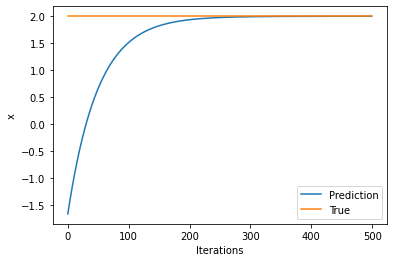

In [69]:
lr = 0.01
history = []

x_f = 2 # Target value
x = tf.Variable([tf.random.normal([1])])
for i in range(500):
  with tf.GradientTape() as tape:
    loss = (x - x_f) ** 2
  grad = tape.gradient(loss, x)
  x_update = x - lr * grad
  x.assign(x_update)
  history.append(x.numpy()[0])
plt.plot(history)
plt.plot([0, 500], [x_f, x_f])
plt.legend(('Prediction', 'True'))
plt.xlabel('Iterations')
plt.ylabel('x');

## Neural_net2

(2700, 2)
Epoch 0: loss 1.647813, train_acc 0.550000, val_acc 0.563333
Epoch 1: loss 0.312921, train_acc 0.940000, val_acc 0.936667
Epoch 2: loss 0.208458, train_acc 0.990000, val_acc 0.960000
Epoch 3: loss 0.174232, train_acc 0.980000, val_acc 0.976667
Epoch 4: loss 0.096891, train_acc 0.980000, val_acc 0.976667
Epoch 5: loss 0.112901, train_acc 0.980000, val_acc 0.980000
Epoch 6: loss 0.097181, train_acc 1.000000, val_acc 0.983333
Epoch 7: loss 0.043677, train_acc 1.000000, val_acc 0.986667
Epoch 8: loss 0.054536, train_acc 1.000000, val_acc 0.986667
Epoch 9: loss 0.136475, train_acc 0.990000, val_acc 0.986667
Epoch 10: loss 0.045265, train_acc 1.000000, val_acc 0.986667
Epoch 11: loss 0.051533, train_acc 1.000000, val_acc 0.986667
Epoch 12: loss 0.043455, train_acc 0.990000, val_acc 0.986667
Epoch 13: loss 0.057515, train_acc 0.990000, val_acc 0.986667
Epoch 14: loss 0.053025, train_acc 0.980000, val_acc 0.986667
Epoch 15: loss 0.030468, train_acc 1.000000, val_acc 0.986667
Epoch 16

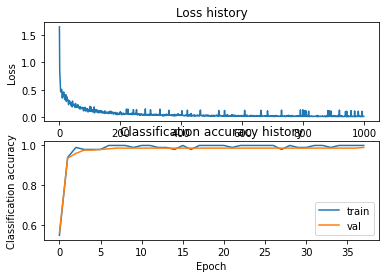

In [70]:
class ShallowNeuralNet(object):
    # Implementing two layer nets
    def __init__(self, input_size, hidden_size, output_size, std=1e-4):

        """
        W1 : first layer weights, shape (D, H)
        b1 : first layer biases, shape (H, )
        W2 : second layer weights, shape (H, C)
        b2 : second layer biases, shape (C, )
        """

        self.params = {}
        self.params['W1'] = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
        self.params['b2'] = np.zeros(output_size)

    def loss(self, X, y=None, reg=0.0):
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        N, D = X.shape

        # Forward propagation
        Z1 = X @ W1 + b1
        A1 = np.maximum(0, Z1)  # Relu
        Z2 = A1 @ W2 + b2

        if y is None:
            scores = Z2
            return scores

        Z2 -= np.max(Z2, axis=1, keepdims=True)
        Z2_exp = np.exp(Z2)
        scores = Z2_exp / np.sum(Z2_exp, axis=1, keepdims=True)
        loss = np.sum(-np.log(scores[np.arange(N), y]))
        loss /= N
        loss += reg * (np.sum(W2 * W2) + np.sum(W1 * W1))

        # Backward propagation
        grads = {}
        scores[np.arange(N), y] -= 1
        scores /= N

        # W2 gradient
        dW2 = A1.T @ scores

        # b2 gradient
        db2 = scores.sum(axis=0)

        # W1 gradient
        dA1 = scores @ (W2.T)
        dZ1 = dA1 * (Z1 > 0)
        dW1 = X.T @ dZ1

        # b1 gradient
        db1 = dZ1.sum(axis=0)

        # regularization gradient
        dW1 += reg * 2 * W1
        dW2 += reg * 2 * W2

        grads = {'W1': dW1, 'b1': db1, 'W2': dW2, 'b2': db2}

        return loss, grads

    def fit(self, X, y, X_val, y_val, lr=1e-3, lr_decay=0.95, reg=5e-6, num_iters=100, batch_size=200, verbose=False):
        num_train = X.shape[0]
        print(X.shape)
        iter_per_epoch = max(num_train / batch_size, 1)
        # Use SGD to optimize the parameters in self.model
        loss_history = []
        train_acc_history = []
        val_acc_history = []
        epoch = 0
        for iter in range(num_iters):
            X_batch = None
            y_batch = None

            batches_indices = np.random.choice(num_train, batch_size)
            X_batch = X[batches_indices]
            y_batch = y[batches_indices]

            # Compute loss and gradients using the current batches
            loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
            loss_history.append(loss)

            # Update parameters
            for key in self.params:
                self.params[key] -= lr * grads[key]

            #if verbose and iter % 100 == 0:
                #print('iteration %d / %d: loss %f' % (iter, num_iters, loss))

            # Every epoch, check train and val accuracy and decay learning rate
            if verbose and iter % iter_per_epoch == 0:
                train_acc = (self.predict(X_batch) == y_batch).mean()
                val_acc = (self.predict(X_val) == y_val).mean()
                train_acc_history.append(train_acc)
                val_acc_history.append(val_acc)
                print('Epoch %d: loss %f, train_acc %f, val_acc %f' % (epoch, loss, train_acc, val_acc))

                # Increment epoch (hôm lúc mình dạy mình quên tăng epoch lên 1 sau  mỗi vòng nên lúc in các bạn thấy
                # toàn in 'Epoch 0'. Tuy nhiên điều này chỉ ảnh hưởng đến việc in ở chỗ 'Epoch %d:..' bên trên thôi
                # còn lại ko ảnh hưởng đến kết quả chúng ta đã có.
                epoch += 1
                # Decay learning rate
                lr *= lr_decay

        return {
                'loss_history': loss_history,
                'train_acc_history': train_acc_history,
                'val_acc_history': val_acc_history
                }

    def predict(self, X):
        y_preds = np.argmax(self.loss(X), axis=1)
        return y_preds

# Create data
num_train_per_epoch = 1000
num_classes = 3
input_size = 2
hidden_size = 3


X1 = np.random.randn(num_train_per_epoch, input_size) + np.array([3, 2])
X2 = np.random.randn(num_train_per_epoch, input_size) + np.array([-3, 2])
X3 = np.random.randn(num_train_per_epoch, input_size) + np.array([0, -3])
X_train = np.vstack([X1[:900], X2[:900], X3[:900]])
y_train = np.array([0] * 900 + [1] * 900 + [2] * 900)
X_val = np.vstack([X1[900:], X2[900:], X3[900:]])
y_val = np.array([0] * 100 + [1] * 100 + [2] * 100)
"""
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)
plt.show()
"""
net = ShallowNeuralNet(input_size, hidden_size, num_classes)
model = net.fit(X_train, y_train, X_val, y_val, batch_size=100, num_iters=1000, verbose=True, reg=0.0, lr_decay=1, lr = 1e-1)

train_acc = (net.predict(X_train) == y_train).mean()
val_acc = (net.predict(X_val) == y_val).mean()
print('Training accuracy: ', train_acc)
print('Validation accuracy: ', val_acc)



# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(model['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(model['train_acc_history'], label='train')
plt.plot(model['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

## tensorflow_ANN

In [71]:
class Neural_Network(object):
  def __init__(self, layers):
    self.layers = layers
    self.num_layers = len(layers) - 1
    self.params = {}
    self.grads = {}
    
    for i in range(self.num_layers):
      self.params['W'+str(i+1)] = tf.Variable(tf.random.normal(shape=(self.layers[i], self.layers[i+1])))
      self.params['b'+str(i+1)] = tf.Variable(tf.random.normal(shape=(self.layers[i+1], )))

  def forward(self, X):
    A = tf.convert_to_tensor(X, dtype=tf.float32)
    for i in range(self.num_layers):
      W = self.params['W'+str(i+1)]
      b = self.params['b'+str(i+1)]
      Z = tf.matmul(A, W) + b
      if i != self.num_layers -1 :
        A = tf.nn.relu(Z)
      else:
        A = Z 
    return A

  def compute_loss(self, A, y):
    loss = tf.nn.softmax_cross_entropy_with_logits(y, A)
    return tf.reduce_mean(loss)

  def update_params(self, lr):
    for i in range(self.num_layers):
      self.params['W'+str(i+1)].assign_sub(lr * self.grads['W'+str(i+1)])
      self.params['b'+str(i+1)].assign_sub(lr * self.grads['b'+str(i+1)])

  def predict(self, X):
    A = self.forward(X)
    return tf.argmax(tf.nn.softmax(A), axis=1)

  def train_on_batch(self, X, y, lr):
     X = tf.convert_to_tensor(X, dtype=tf.float32)
     y = tf.convert_to_tensor(y, dtype=tf.float32)

     with tf.GradientTape(persistent=True) as tape:
       A = self.forward(X)
       loss = self.compute_loss(A, y)
     for i in range(self.num_layers):
       self.grads['W'+str(i+1)] = tape.gradient(loss, self.params['W'+str(i+1)])
       self.grads['b'+str(i+1)] = tape.gradient(loss, self.params['b'+str(i+1)])
     del tape
     self.update_params(lr)

     return loss.numpy()

  def train(self, X_train, y_train, X_test, y_test, epochs, steps_per_epoch, batch_size, lr):
    history = {
        'train_acc' :[],
        'val_acc' :[],
        'train_loss':[]
    }
    for e in range(epochs):
      epoch_train_loss = 0
      print('Epoch {}'.format(e), end='-')
      for i in range(steps_per_epoch):
        X_batch = X_train[i*batch_size:(i+1)*batch_size] 
        y_batch = y_train[i*batch_size:(i+1)*batch_size]

        batch_loss = self.train_on_batch(X_batch, y_batch, lr)
        epoch_train_loss += batch_loss

        if i%int(steps_per_epoch/10) == 0:
          print(end='-')

      history['train_loss'].append(epoch_train_loss/steps_per_epoch)
      val_A = self.forward(X_test)
      train_preds = self.predict(X_train)
      train_acc = np.mean(np.argmax(y_train, axis=1) == train_preds.numpy())
      history['train_acc'].append(train_acc)
      val_preds = self.predict(X_test)
      val_acc =  np.mean(np.argmax(y_test, axis=1) == val_preds.numpy())
      history['val_acc'].append(val_acc)

      print('Train_acc: {}. Val_acc: {}'.format(train_acc, val_acc))
    return history

In [72]:
def load():
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
  X_train = np.reshape(x_train, (x_train.shape[0], 784)) / 255
  X_test = np.reshape(x_test, (x_test.shape[0], 784)) / 255
  y_train = tf.keras.utils.to_categorical(y_train)
  y_test = tf.keras.utils.to_categorical(y_test)
  return (X_train, y_train), (X_test, y_test)

def plot_random_images(x, y, p=None):
  indices = np.random.choice(range(x.shape[0]), 10)
  y = np.argmax(y, axis= 1)
  if p is None:
    p = y
  plt.figure(figsize=(10, 5))
  for i, index in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(x[index].reshape((28, 28)), cmap='binary')
    plt.xticks([])
    plt.yticks([])
    if y[index] == p[index]:
      col = 'g'
    else:
      col = 'r'
    plt.xlabel(str(p[index]), color = col)
  return plt


In [73]:
(X_train, y_train), (X_test, y_test) = load()

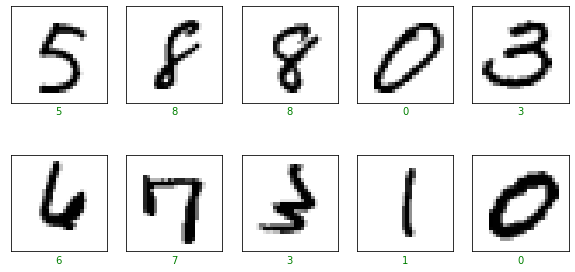

In [74]:
plot_random_images(X_train, y_train).show()

In [75]:
net = Neural_Network([784, 128, 128, 10])

In [76]:
net.layers[1]

128

In [77]:
batch_size = 120
epochs = 10
steps_per_epoch = int(X_train.shape[0] / batch_size)
lr = 3e-3

In [78]:
history = net.train(X_train, y_train, X_test, y_test, epochs, steps_per_epoch, batch_size, lr)

Epoch 0-----------Train_acc: 0.8063833333333333. Val_acc: 0.8123
Epoch 1-----------Train_acc: 0.8339. Val_acc: 0.8346
Epoch 2-----------Train_acc: 0.8481. Val_acc: 0.8485
Epoch 3-----------Train_acc: 0.8585833333333334. Val_acc: 0.8563
Epoch 4-----------Train_acc: 0.8652166666666666. Val_acc: 0.8633
Epoch 5-----------Train_acc: 0.8721333333333333. Val_acc: 0.8686
Epoch 6-----------Train_acc: 0.8762833333333333. Val_acc: 0.8736
Epoch 7-----------Train_acc: 0.8799. Val_acc: 0.8764
Epoch 8-----------Train_acc: 0.8846833333333334. Val_acc: 0.8797
Epoch 9-----------Train_acc: 0.8877333333333334. Val_acc: 0.8795


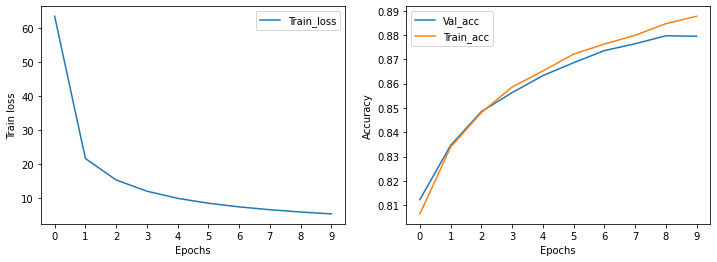

In [82]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), history['train_loss'], label='Train_loss')
plt.xticks(list(range(epochs)))
plt.xlabel('Epochs')
plt.ylabel('Train loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), history['val_acc'], label='Val_acc')
plt.plot(range(epochs), history['train_acc'], label='Train_acc')
plt.xticks(list(range(epochs)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

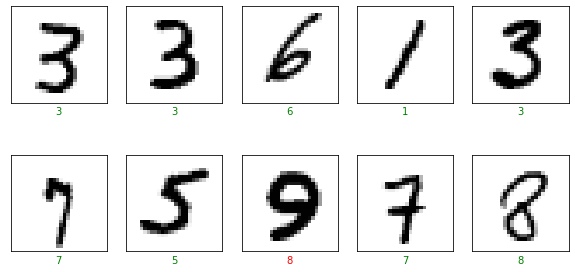

In [80]:
y_preds = net.predict(X_test).numpy()
plot_random_images(X_test, y_test, y_preds).show()